In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load the cleaned dataset
df = pd.read_csv('german_credit_data.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
# Handle missing values by filling with a placeholder or a statistical value
df = df.copy()  # Ensure df is a copy and avoid chained assignment issues
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

# Encode categorical variables
label_encoders = {}
for column in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the cleaned and encoded dataset
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,1,2,1,4,0,1169,6,5
1,1,22,0,2,1,0,1,5951,48,5
2,2,49,1,1,1,0,3,2096,12,3
3,3,45,1,2,0,0,0,7882,42,4
4,4,53,1,2,0,0,0,4870,24,1


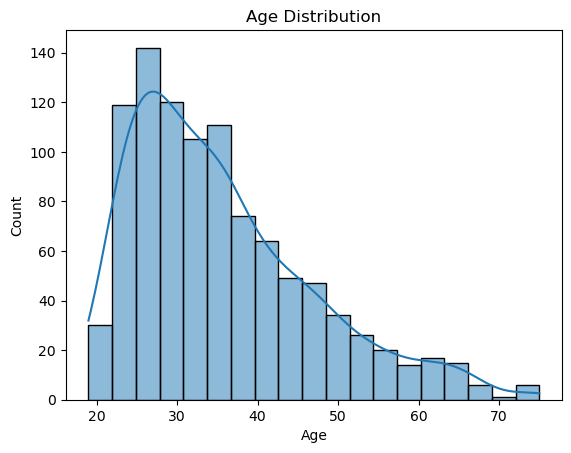

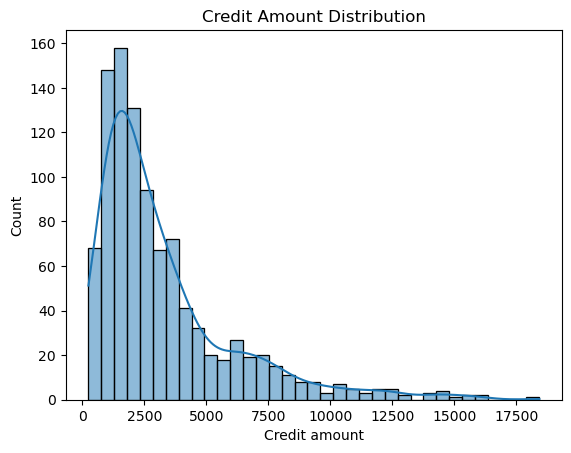

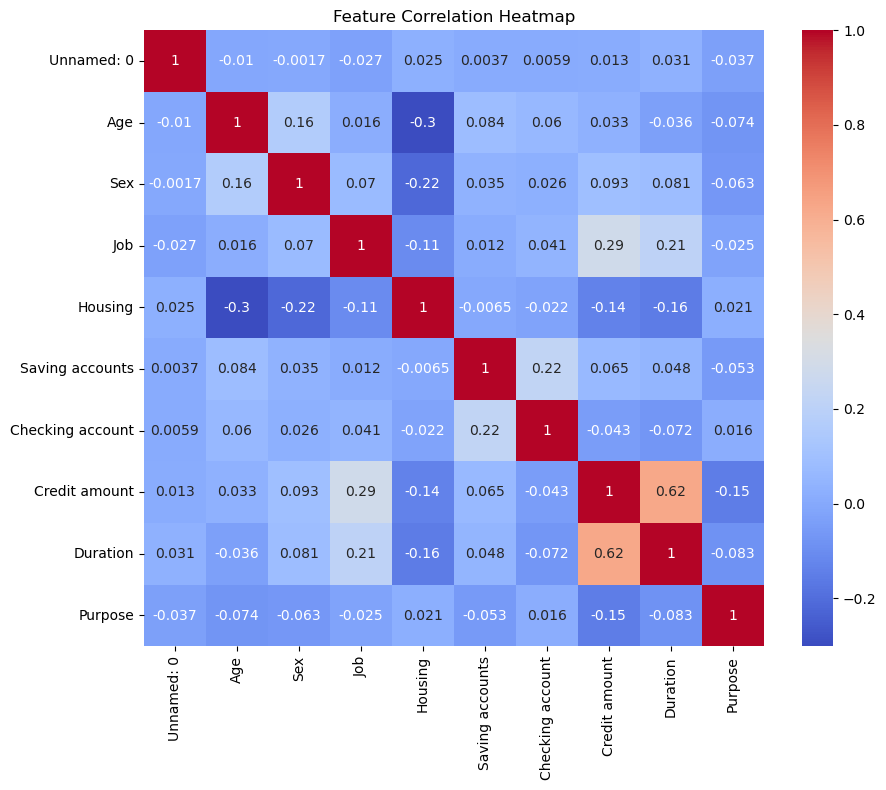

In [7]:
# Ensure that any infinite values are converted to NaN before analysis
df = df.replace([np.inf, -np.inf], np.nan)

# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Credit amount distribution
sns.histplot(df['Credit amount'], kde=True)
plt.title('Credit Amount Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [9]:
# Define features and target
X = df.drop(columns=['Credit amount'])  # Assuming 'Credit amount' as target
y = df['Credit amount'] > df['Credit amount'].median()  # Binary classification (High/Low Credit Amount)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.74
Confusion Matrix:
[[124  31]
 [ 47  98]]
Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.80      0.76       155
        True       0.76      0.68      0.72       145

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [15]:
# Add predictions to the DataFrame
df_test = df.iloc[y_test.index].copy()  # Create a copy of the test dataset rows from the original DataFrame
df_test['Prediction'] = y_pred
df_test['Actual'] = y_test.values

# True Negatives: Actual = 0 (low risk), Prediction = 0 (low risk)
true_negatives = df_test[(df_test['Actual'] == 0) & (df_test['Prediction'] == 0)]

# True Positives: Actual = 1 (high risk), Prediction = 1 (high risk)
true_positives = df_test[(df_test['Actual'] == 1) & (df_test['Prediction'] == 1)]

# Display True Negatives
print("True Negatives (Low risk correctly predicted as low risk):")
display(true_negatives)

# Display True Positives
print("\nTrue Positives (High risk correctly predicted as high risk):")
display(true_positives)

True Negatives (Low risk correctly predicted as low risk):


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Prediction,Actual
660,660,23,1,2,2,0,2,1297,12,5,False,False
626,626,41,1,2,1,0,2,2116,6,4,False,False
513,513,20,1,2,2,0,1,585,12,5,False,False
811,811,28,1,1,1,0,1,484,6,5,False,False
883,883,65,0,0,1,0,3,1098,18,5,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
717,717,32,1,3,0,0,3,1505,18,5,False,False
449,449,61,1,2,1,3,1,1512,15,6,False,False
362,362,36,0,2,1,0,2,2247,12,1,False,False
428,428,20,1,2,1,0,3,1313,9,4,False,False



True Positives (High risk correctly predicted as high risk):


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Prediction,Actual
740,740,32,1,2,1,1,0,2325,24,1,True,True
411,411,35,1,3,1,0,3,7253,33,1,True,True
136,136,27,1,2,1,3,3,8613,27,1,True,True
76,76,34,1,2,1,0,0,3965,42,5,True,True
973,973,36,1,2,2,0,0,7297,60,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
946,946,30,1,2,0,2,0,3349,24,4,True,True
796,796,51,1,2,0,4,0,7511,18,1,True,True
501,501,42,1,2,0,0,0,5493,36,1,True,True
468,468,26,0,2,1,0,3,2764,33,0,True,True
